In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
df = pd.read_pickle("processed_data.pkl")
df.describe()

,Sentiment_Score_nltk,Comment_Length
count,17874.000000,17874.000000
mean,0.391501,177.705214
std,0.476521,252.135479
min,-0.997300,2.000000
25%,0.000000,66.000000
50%,0.510600,113.000000
75%,0.806150,201.000000
max,0.999800,7847.000000


# Rozkład zmiennej "Sentiment"

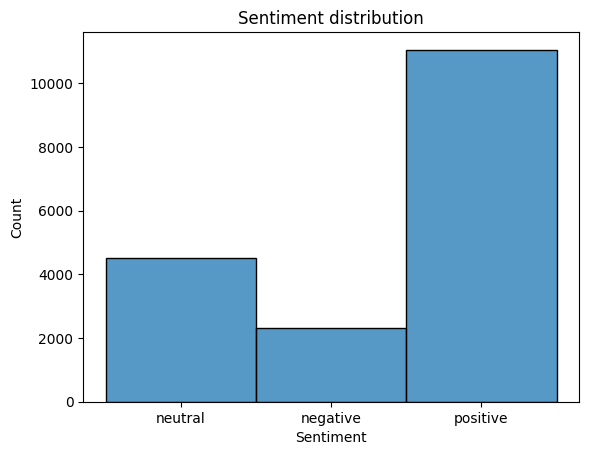

In [3]:
sentiments = sns.histplot(df['Sentiment'])
sentiments.set_title("Sentiment distribution")
plt.show()

# Rozkład zmiennej "Comment"

<Axes: xlabel='Comment_Length', ylabel='Count'>

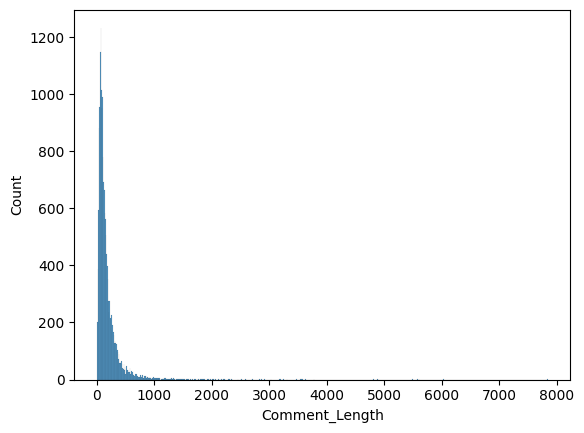

In [4]:
sns.histplot(df['Comment_Length'])

In [5]:
df['Comment_Length'].describe()

count    17874.000000
mean       177.705214
std        252.135479
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: Comment_Length, dtype: float64

In [6]:
df['Comment_Length']

0        317
1        163
2        183
3        450
4        135
        ... 
18403    277
18404    118
18405    244
18406     88
18407    404
Name: Comment_Length, Length: 17874, dtype: int64

In [7]:
df.sort_values(by="Comment_Length", ascending = True)

,Comment,Sentiment,Sentiment_Score_nltk,Starts_with_i,Comment_Length
11631,哈哈,neutral,0.0000,False,2
16473,jó,neutral,0.0000,False,2
10520,bye,neutral,0.0000,False,3
11112,wow,positive,0.5859,False,3
10926,6th,positive,0.0000,False,3
...,...,...,...,...,...
11370,i found this very interesting and as someone w...,positive,0.9972,True,5487
10493,tracklist 0000 kanisan ft wishes and dreams m...,neutral,0.9967,False,5586
18276,000000 00 introduction to the video speaker ml...,neutral,0.9957,False,5597
16407,description of exclusive video footage 110 pan...,neutral,-0.0642,False,6031


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17874 entries, 0 to 18407
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comment               17874 non-null  object 
 1   Sentiment             17874 non-null  object 
 2   Sentiment_Score_nltk  17874 non-null  float64
 3   Starts_with_i         17874 non-null  bool   
 4   Comment_Length        17874 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 715.7+ KB


In [9]:
bins = [0, df['Comment_Length'].quantile(0.25), df['Comment_Length'].quantile(0.5), df['Comment_Length'].quantile(0.75), df['Comment_Length'].max()]
labels = ['short', 'medium', 'long', 'very long']
df['Comment_Length_Binned'] = pd.cut(df['Comment_Length'],bins = bins, labels = labels, right = False)

<Axes: xlabel='Comment_Length_Binned', ylabel='Count'>

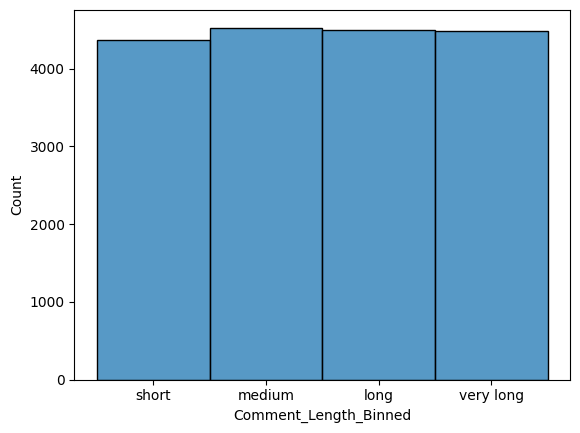

In [10]:
sns.histplot(df['Comment_Length_Binned'])

<Axes: xlabel='Sentiment', ylabel='Count'>

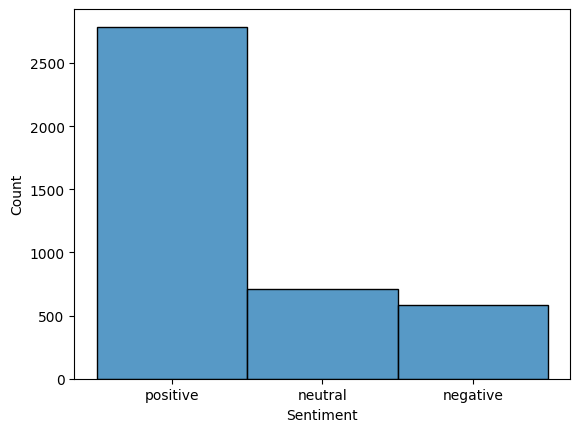

In [12]:
sns.histplot(df[df["Starts_with_i"] == True]['Sentiment'])